In [1]:
# Loan approval modeling exercise (Analytics Vidhya)

In [2]:
# dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import os



In [4]:
# read in test data from csv file into dataframe and view top 10
train_df = pd.read_csv('train_loan.csv')
train_df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# describe core stats of numerical data columns
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# get count of possible values of select data columns
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

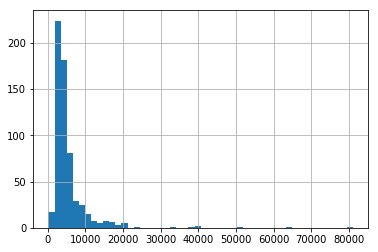

In [10]:
# Begin Distribution anaylsis of ApplicantIncome and LoanAmount
# ApplicantIncome historgram.
%matplotlib inline
train_df['ApplicantIncome'].hist(bins=50)


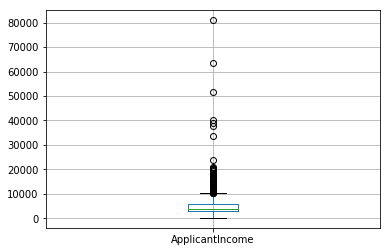

In [11]:
# ApplicantIncome boxplot
%matplotlib inline
train_df.boxplot(column='ApplicantIncome')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


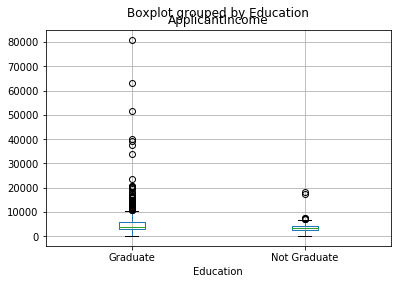

In [12]:
# filter ApplicantIncome boxplot by enducation to manage outliers
%matplotlib inline
train_df.boxplot(column='ApplicantIncome', by='Education')

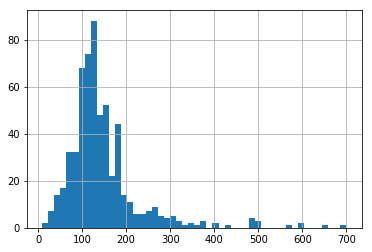

In [13]:
# LoanAmount histogram
%matplotlib inline
train_df['LoanAmount'].hist(bins=50)

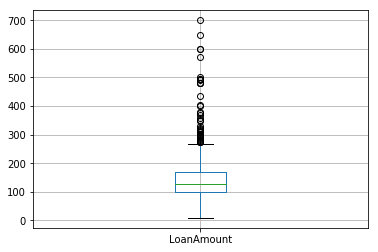

In [14]:
# LoanAmount boxplot
%matplotlib inline
train_df.boxplot(column='LoanAmount')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


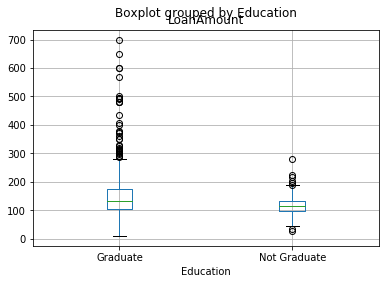

In [15]:
# assess LoanAmount boxplot by education to explore outliers
%matplotlib inline
train_df.boxplot(column='LoanAmount', by='Education')

In [16]:
# Count credit history evaluation and calculate prob. of getting approved

temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status', index=['Credit_History'],
                             aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())

# Display results
print ('Credit History Frequency Table:')
print (temp1)

print ('\nProb. of gettign loan by Credit History:')
print (temp2)


Credit History Frequency Table:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Prob. of gettign loan by Credit History:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan based on Credit History')

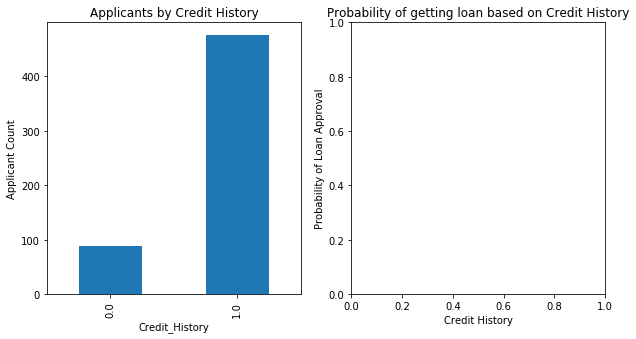

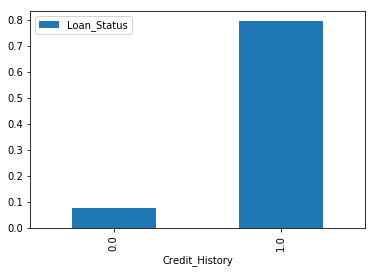

In [35]:
# Visualize the above temp table data as bar charts
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_ylabel('Applicant Count')
ax1.set_xlabel('Credit_History')
ax1.set_title('Applicants by Credit History')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_ylabel('Probability of Loan Approval')
ax2.set_xlabel('Credit History')
ax2.set_title('Probability of getting loan based on Credit History')

#############################
### Resolve subplot issue ###
#############################